# SVM支持向量机原理可视化

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 创建数据

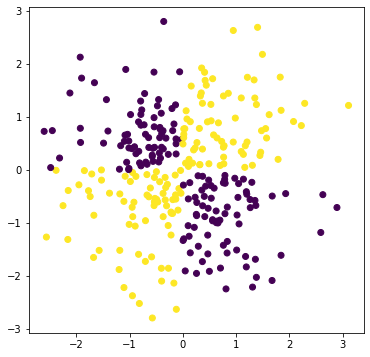

In [2]:
rs = np.random.RandomState(256) # 种子，生成随机数字，固定了

X = rs.randn(300,2)

# y目标值，一三象限是1，二四象限是0
y = [1 if i > 0 else 0 for i in X[:,0] * X[:,1]]

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c = y)

## 建模学习

In [11]:
svc = SVC(kernel='rbf')

# 规律，一三象限是一个类别，二四象限是另一个类别
svc.fit(X,y)

SVC()

## 创建测试数据

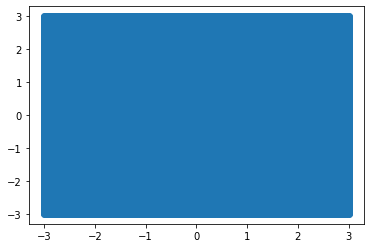

In [12]:
X1 = np.linspace(-3,3,200)
X2 = np.linspace(-3,3,180)

X1,X2 = np.meshgrid(X1,X2)

# 测试数据,36000个测试点，密密麻麻
X_test = np.column_stack([X1.ravel(),X2.ravel()])

plt.scatter(X_test[:,0],X_test[:,1])

## 算法预测

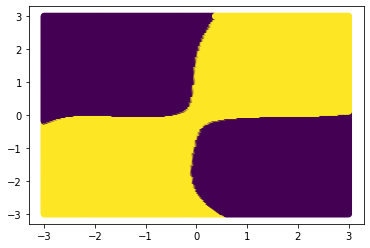

In [13]:
y_pred = svc.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

## 算法原理可视化

 SVC对数据划分，直线划分两类
 高维，超平面
 不同点，距离超平面不同！

In [14]:
d = svc.decision_function(X_test)# 36000个距离

d

array([0.079971  , 0.08556803, 0.09146665, ..., 0.31020115, 0.30330881,
       0.29658013])

In [15]:
print(d.max(),d.min())

2.9853508596862146 -3.381189115998357


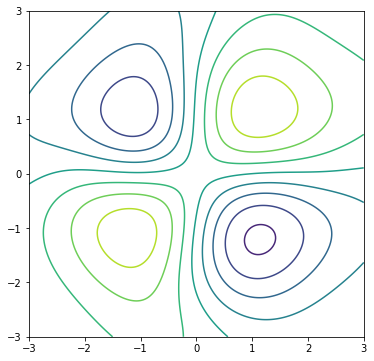

In [16]:
# 轮廓线
plt.figure(figsize=(6,6))
plt.contour(X1,X2,d.reshape(180,200))

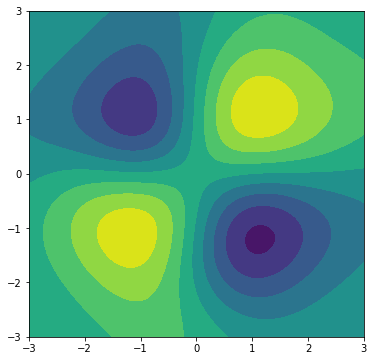

In [17]:
# 轮廓面
plt.figure(figsize=(6,6))
plt.contourf(X1,X2,d.reshape(180,200))

## 3D显示距离

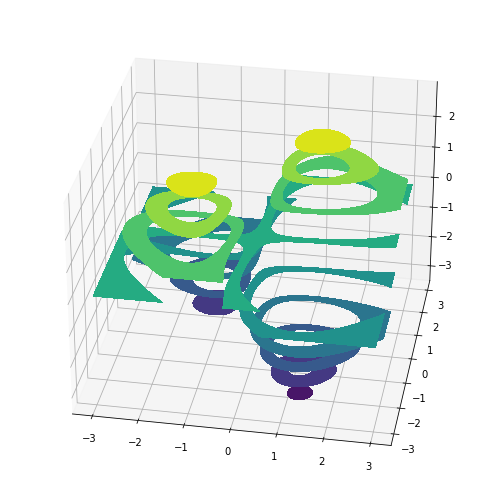

In [20]:
plt.figure(figsize=(12,9))
ax = plt.subplot(111,projection = '3d')

ax.contourf(X1,X2,d.reshape(180,200))
ax.view_init(30,-80)

# SVC参数优化

In [21]:
import numpy as np
from sklearn.svm import SVC

In [22]:
def read_data(path):
    with open(path) as f :
        lines=f.readlines()
    lines=[eval(line.strip()) for line in lines]
    X,y=zip(*lines)
    
    X=np.array(X)
    y=np.array(y)
    return X,y

In [23]:
X_train,y_train = read_data('./data/train_data')
display(X_train.shape)

(500, 2)

In [24]:
np.unique(y_train)

array([0, 1])

In [25]:
X_test,y_test = read_data('./data/test_data')
display(X_test.shape)

(100, 2)

In [26]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train.ravel())
svc.score(X_test,y_test.ravel())

0.83

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
%%time
svc = SVC(kernel='sigmoid') # 不同C，效果不同啊：0.1,0.5,1,10……
params = {'C':np.logspace(-3,3,50),'tol':[0.0001,0.001,0.01,0.1,1]}
gc = GridSearchCV(estimator = svc,param_grid = params,cv = 5)
gc.fit(X_train,y_train.ravel())

CPU times: user 8.9 s, sys: 21.7 ms, total: 8.92 s
Wall time: 8.92 s


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1]})

In [29]:
gc.best_params_

{'C': 0.21209508879201905, 'tol': 0.0001}

In [30]:
gc.score(X_test,y_test.ravel())

0.98